In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# read the data from the csv file
df = pd.read_csv('data/dataset_finale_avec_nouvelles_dates_et_PIB.csv')

## Cleaning

In [69]:
df = df.drop(columns=["Unnamed: 0"])
# remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VPN                   8398 non-null   object 
 1   Date                  8398 non-null   object 
 2   Depart                8398 non-null   object 
 3   Arrivé                8398 non-null   object 
 4   Prix                  8398 non-null   object 
 5   Temps de vol          8398 non-null   object 
 6   Heure de départ       8398 non-null   object 
 7   Heure d'arrivé        8398 non-null   object 
 8   Nombre d'escales      8398 non-null   object 
 9   Compagnies            8398 non-null   object 
 10  PIB par habitant (€)  8398 non-null   float64
dtypes: float64(1), object(10)
memory usage: 721.8+ KB


In [5]:
# remove the € in df["Prix"]
df["Prix"] = df["Prix"].apply(lambda x: x.replace(" €", ""))
df["Prix"] = df["Prix"].apply(lambda x: x.replace(" ", ""))
df["Prix"] = df["Prix"].astype("int")

In [6]:
# Extract the last word from depart
df["Depart_pays"] = df["Depart"].apply(lambda x: x.split(",")[-1])
df["Arrivé_pays"] = df["Arrivé"].apply(lambda x: x.split(",")[-1])

df["Depart_Arrive"]=""
for i in range(len(df)):
    df["Depart_Arrive"][i] = str(df["Depart_pays"][i]) + " to" + str(df["Arrivé_pays"][i])

C:\Users\julie\AppData\Local\Temp\ipykernel_18408\323655397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Depart_Arrive"][i] = str(df["Depart_pays"][i]) + " to" + str(df["Arrivé_pays"][i])


### Pour visualier le prix des vols en fonction du VPN

In [38]:
# Sort the data by date, Depart, Arrival, and time
df_sorted_by_same_flight = df.groupby(by=['Date', 'Depart', 'Arrivé', 'Temps de vol',
       'Heure de départ', "Heure d'arrivé", "Nombre d'escales", 'Compagnies',"Depart_pays","Arrivé_pays","Depart_Arrive"])["Prix", "VPN"].agg(lambda x:x.tolist()).reset_index()

C:\Users\julie\AppData\Local\Temp\ipykernel_18408\1022168163.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sorted_by_same_flight = df.groupby(by=['Date', 'Depart', 'Arrivé', 'Temps de vol',


In [39]:
df_sorted_by_same_flight.sort_values(["Date", "Heure de départ", "Heure d'arrivé", "Temps de vol"], inplace=True, ignore_index=True)
df_sorted_by_same_flight

,Date,Depart,Arrivé,Temps de vol,Heure de départ,Heure d'arrivé,Nombre d'escales,Compagnies,Depart_pays,Arrivé_pays,Depart_Arrive,Prix,VPN
0,2023-01-30,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",8h 55m,01:20,13:45,1 escale,Plusieurs compagnies,Egypte,Inde,Egypte to Inde,"[326, 326, 334, 334, 334, 326, 334, 326, 334]","[Bangladesh, Cambodge, Liechtenstein, Luxembou..."
1,2023-01-30,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",8h 55m,01:20,13:45,1 escale,Qatar Airways,Egypte,Inde,Egypte to Inde,"[318, 318, 318, 321, 321, 321, 318, 321, 318, ...","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
2,2023-01-30,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",9h 40m,06:00,19:10,1 escale,Etihad Airways,Egypte,Inde,Egypte to Inde,"[150, 147, 131, 147, 147, 152, 150, 152, 131, ...","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
3,2023-01-30,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",15h 10m,06:00,22:10,1 escale,KLM,Italie,Afrique du sud,Italie to Afrique du sud,"[496, 496, 496, 492, 492, 492, 496, 492, 496, ...","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
4,2023-01-30,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",3h 40m,06:05,08:45,1 escale,LOT Polish Airlines,Lettonie,Autriche,Lettonie to Autriche,"[83, 95, 95, 96, 96, 96, 96, 96, 96, 95]","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2023-02-28,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,19h 0m,22:10,16:10,1 escale,easyJet,Espagne,Espagne,Espagne to Espagne,"[38, 38, 38, 38, 38, 38, 38, 38, 38, 38]","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
1250,2023-02-28,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",6h 26m,22:15,01:41,Direct,JetBlue,Etats-Unis,Etats-Unis,Etats-Unis to Etats-Unis,"[93, 93, 93, 142, 93, 93, 93, 93, 93, 93]","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
1251,2023-02-28,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",13h 25m,22:40,13:05,1 escale,Ethiopian Airlines,Italie,Afrique du sud,Italie to Afrique du sud,"[460, 460, 460, 467, 459, 459, 457, 459, 460, ...","[Bangladesh, Cambodge, Inde, Liechtenstein, Lu..."
1252,2023-02-28,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",10h 20m,23:30,13:20,1 escale,Plusieurs compagnies,Egypte,Inde,Egypte to Inde,"[218, 218, 218, 241, 218, 218, 239]","[Bangladesh, Cambodge, Inde, Liechtenstein, Mo..."


In [40]:
df_sorted_by_same_flight["Nb_vols"]=0
for i in range(len(df_sorted_by_same_flight)):
    df_sorted_by_same_flight["Nb_vols"][i]= len(df_sorted_by_same_flight["Prix"][i])

C:\Users\julie\AppData\Local\Temp\ipykernel_18408\3256810383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_by_same_flight["Nb_vols"][i]= len(df_sorted_by_same_flight["Prix"][i])


In [41]:
# df_sorted["Nombre_vols_pour_ce_voyage"]= df_sorted.groupby(by=["Date","Depart","Arrivé"])["Temps de vol"].count().reset_index()
df_sorted_nb_vols = df_sorted_by_same_flight.groupby(by=["Date","Depart","Arrivé", "Depart_pays","Arrivé_pays"])["Temps de vol"].count().reset_index()
df_sorted_nb_vols

,Date,Depart,Arrivé,Depart_pays,Arrivé_pays,Temps de vol
0,2023-01-30,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,Espagne,Espagne,17
1,2023-01-30,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie,Afrique du sud,18
2,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France,Australie,25
3,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France,Japon,24
4,2023-01-30,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis,Etats-Unis,19
5,2023-01-30,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc,Royaume-Uni,18
6,2023-01-30,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie,Autriche,18
7,2023-01-30,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte,Inde,18
8,2023-01-31,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,Espagne,Espagne,26
9,2023-01-31,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie,Afrique du sud,24


### Pour visualiser le prix moyen en fonction du VPN - legende voyage

In [42]:
# Sort the data by date, Depart, Arrival, and time
df_sorted_by_trip = df.groupby(by=["VPN",'Depart', 'Arrivé', "Depart_pays","Arrivé_pays","Depart_Arrive"]).mean("Prix").reset_index()
df_sorted_by_trip

,VPN,Depart,Arrivé,Depart_pays,Arrivé_pays,Depart_Arrive,Prix,PIB par habitant (€)
0,Bangladesh,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,Espagne,Espagne,Espagne to Espagne,68.438095,3570.0
1,Bangladesh,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie,Afrique du sud,Italie to Afrique du sud,509.371429,3570.0
2,Bangladesh,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France,Australie,France to Australie,1349.733333,3570.0
3,Bangladesh,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France,Japon,France to Japon,713.400000,3570.0
4,Bangladesh,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis,Etats-Unis,Etats-Unis to Etats-Unis,109.161905,3570.0
...,...,...,...,...,...,...,...,...
75,Qatar,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France,Japon,France to Japon,731.990476,106165.0
76,Qatar,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis,Etats-Unis,Etats-Unis to Etats-Unis,119.114286,106165.0
77,Qatar,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc,Royaume-Uni,Maroc to Royaume-Uni,155.161905,106165.0
78,Qatar,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie,Autriche,Lettonie to Autriche,88.380952,106165.0


### Evolution du prix moyen VS PIB

In [43]:
df_sorted_by_trip_and_PIB = df.groupby(by=["VPN",'Depart', 'Arrivé', "Depart_Arrive","PIB par habitant (€)"]).mean("Prix").reset_index()
# Sort
df_sorted_by_trip_and_PIB.sort_values(by='PIB par habitant (€)', inplace=True, ignore_index=True)
df_sorted_by_trip_and_PIB

,VPN,Depart,Arrivé,Depart_Arrive,PIB par habitant (€),Prix
0,Cambodge,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France to Australie,3400.0,1338.923810
1,Cambodge,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,3400.0,247.552381
2,Cambodge,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,3400.0,91.847619
3,Cambodge,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,3400.0,169.571429
4,Cambodge,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis to Etats-Unis,3400.0,108.142857
...,...,...,...,...,...,...
75,Liechtenstein,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,118235.0,152.457143
76,Liechtenstein,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,118235.0,86.685714
77,Liechtenstein,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,118235.0,245.704762
78,Liechtenstein,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie to Afrique du sud,118235.0,508.009524


### Only in february

In [52]:
df_28_february = df[(df["Date"] == "2023-02-28")]
df_27_february = df[df["Date"] == "2023-02-27"]
df_26_february = df[df["Date"] == "2023-02-26"]
# concat the 3 dataframes
df_end_february = pd.concat([df_26_february, df_27_february, df_28_february], ignore_index=True)

In [54]:
# Sort the data by date, Depart, Arrival, and time
df_sorted_by_trip_and_PIB_february = df_end_february.groupby(by=["VPN",'Depart', 'Arrivé', "Depart_Arrive","PIB par habitant (€)"]).mean("Prix").reset_index()
df_sorted_by_trip_and_PIB_february.sort_values(by='PIB par habitant (€)', inplace=True, ignore_index=True)
df_sorted_by_trip_and_PIB_february

,VPN,Depart,Arrivé,Depart_Arrive,PIB par habitant (€),Prix
0,Cambodge,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France to Australie,3400.0,1203.511111
1,Cambodge,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,3400.0,238.022222
2,Cambodge,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,3400.0,101.288889
3,Cambodge,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,3400.0,159.244444
4,Cambodge,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis to Etats-Unis,3400.0,118.600000
...,...,...,...,...,...,...
75,Liechtenstein,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,118235.0,152.822222
76,Liechtenstein,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,118235.0,91.333333
77,Liechtenstein,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,118235.0,247.000000
78,Liechtenstein,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie to Afrique du sud,118235.0,497.422222


## Visualisations

### Pour visualier le prix des vols en fonction du VPN

In [ ]:
import random

def random_color():
    hexadecimal=["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    return hexadecimal

Nb voyage: 17


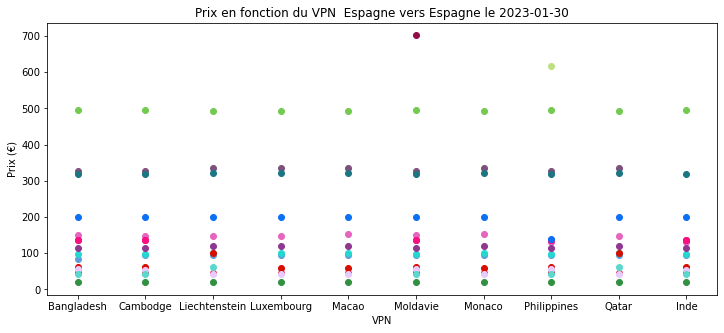

Nb voyage: 18


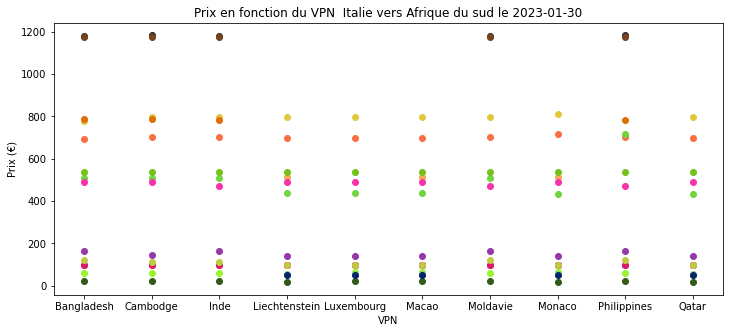

Nb voyage: 25


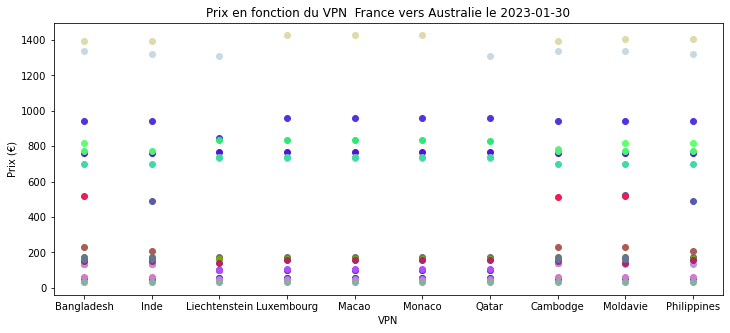

Nb voyage: 24


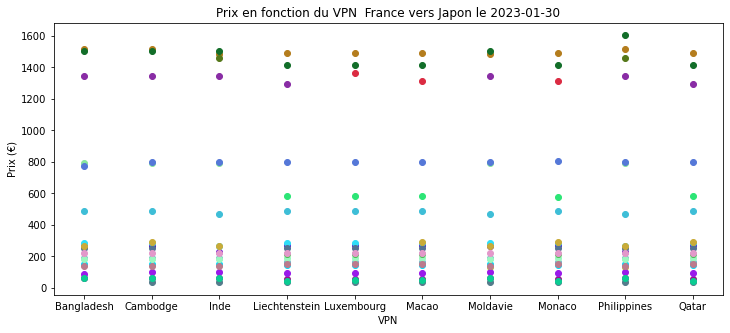

Nb voyage: 19


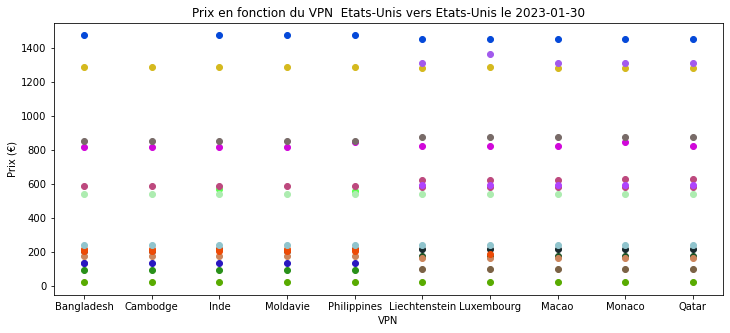

Nb voyage: 18


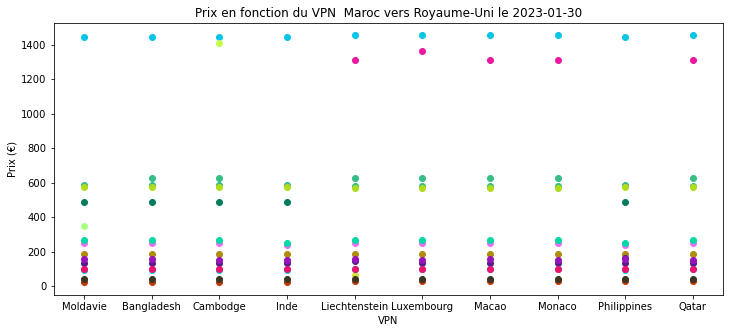

Nb voyage: 18


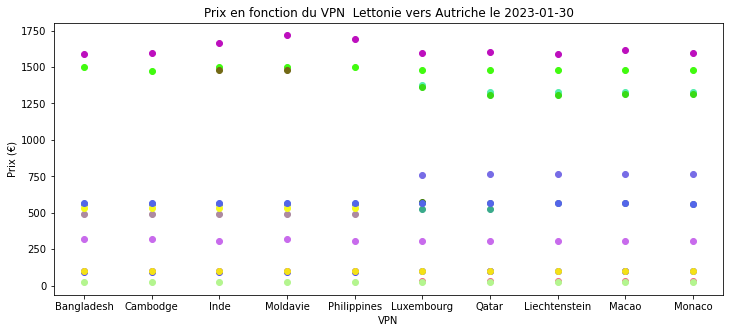

Nb voyage: 18


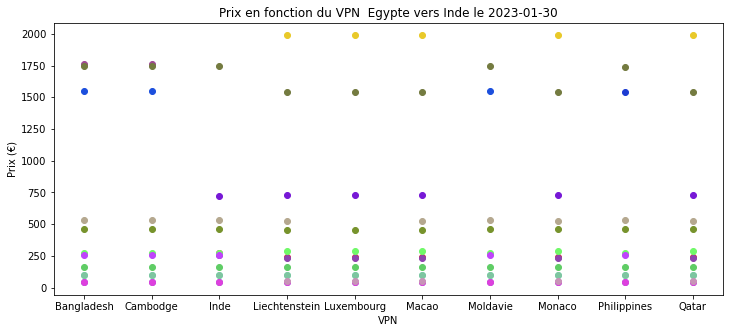

Nb voyage: 26


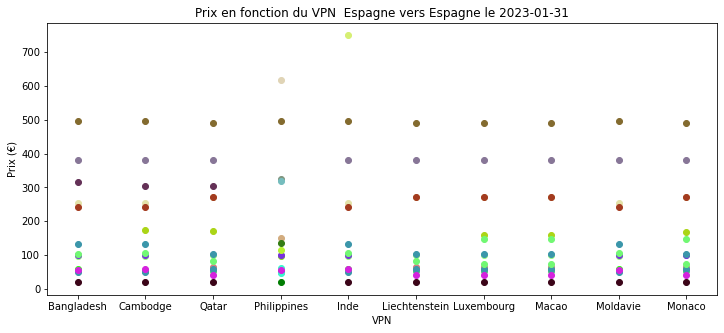

Nb voyage: 24


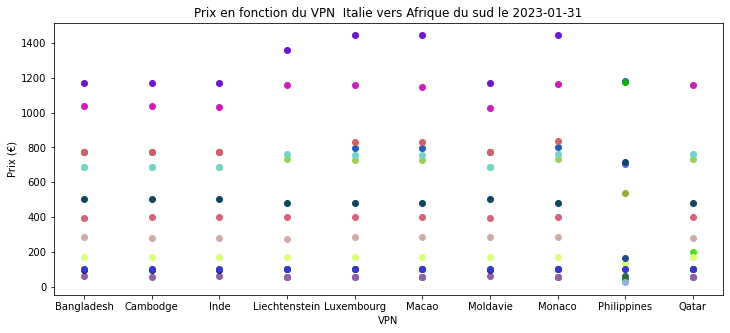

Nb voyage: 34


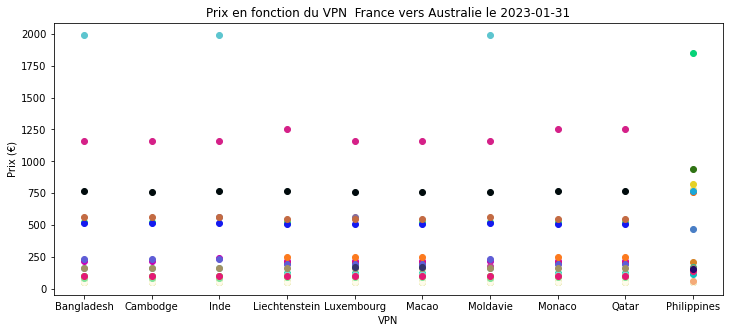

Nb voyage: 31


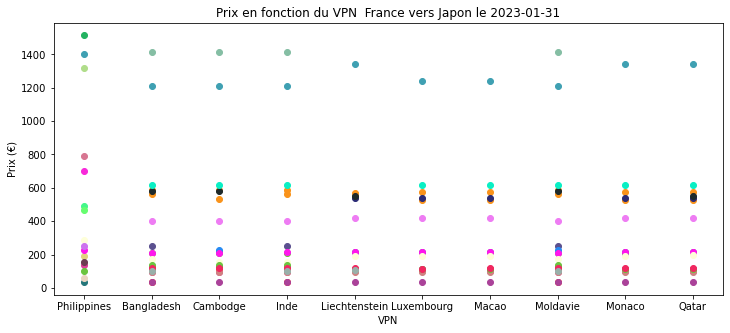

Nb voyage: 21


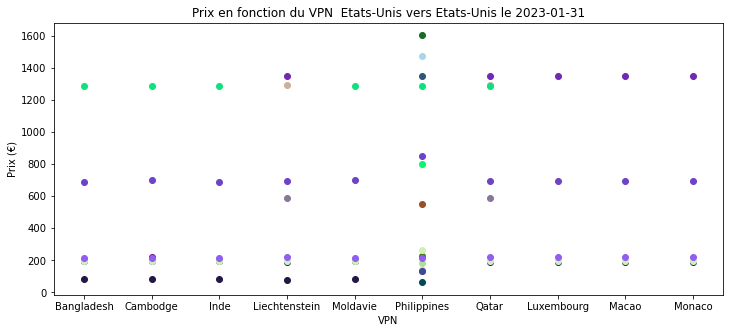

Nb voyage: 31


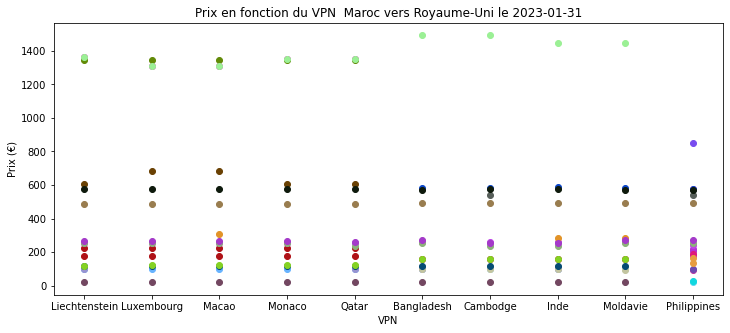

Nb voyage: 28


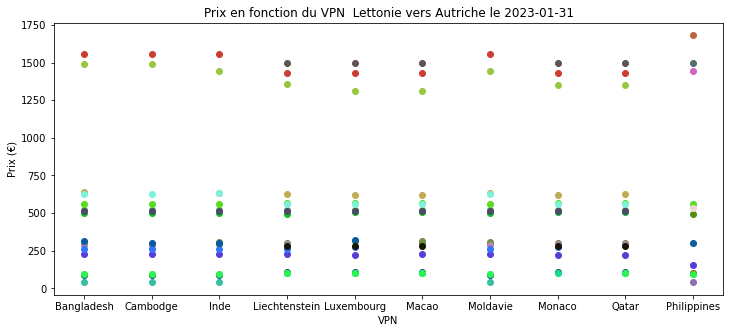

Nb voyage: 26


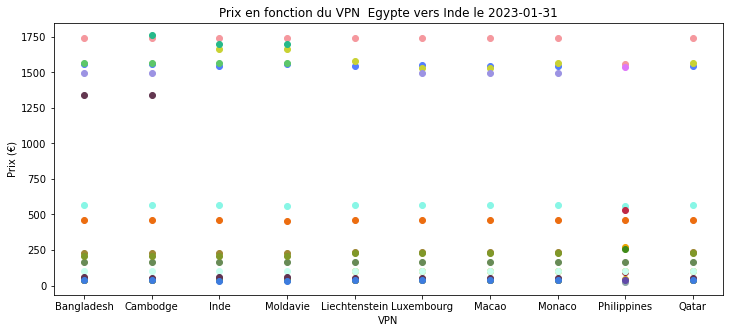

Nb voyage: 24


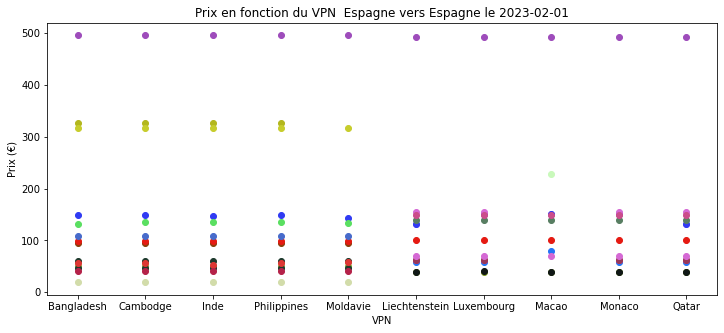

Nb voyage: 21


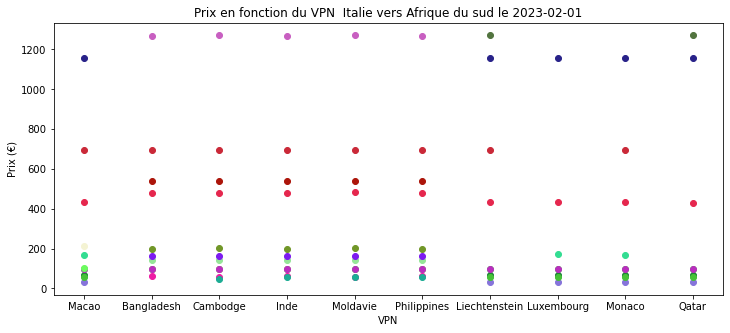

Nb voyage: 33


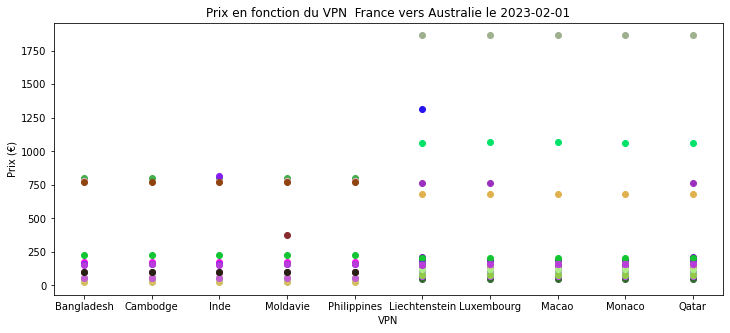

Nb voyage: 28


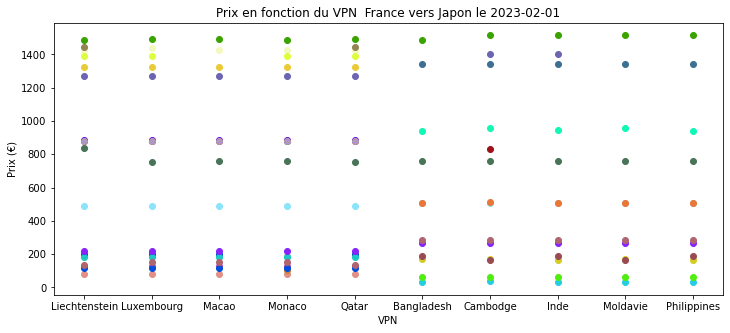

Nb voyage: 24


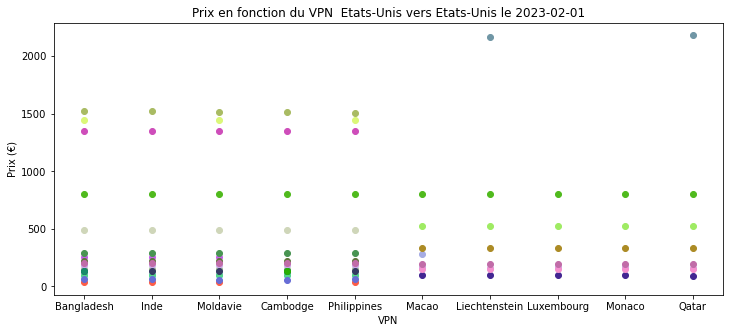

Nb voyage: 28


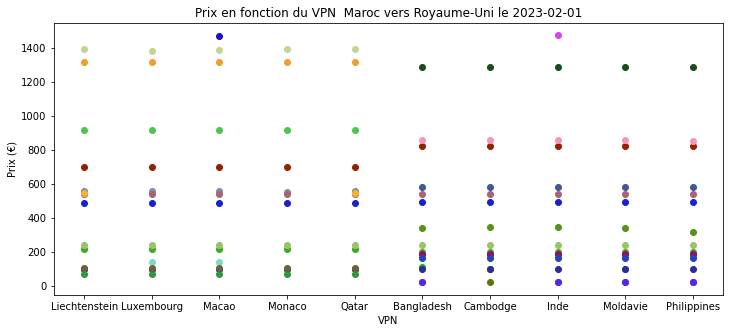

Nb voyage: 34


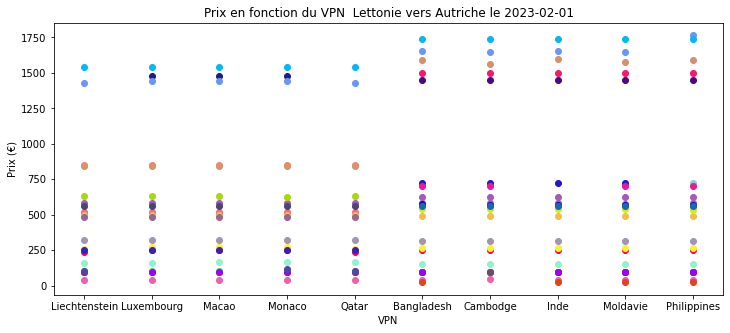

Nb voyage: 22


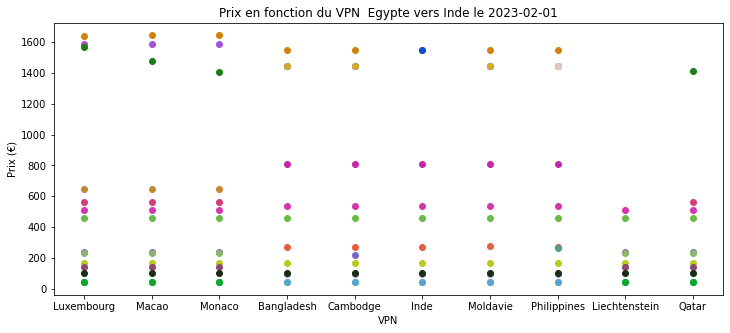

Nb voyage: 23


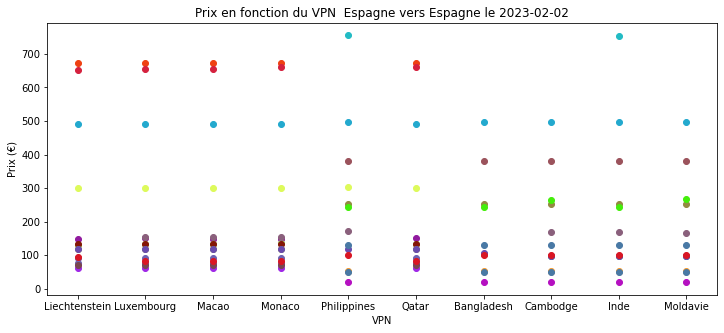

Nb voyage: 24


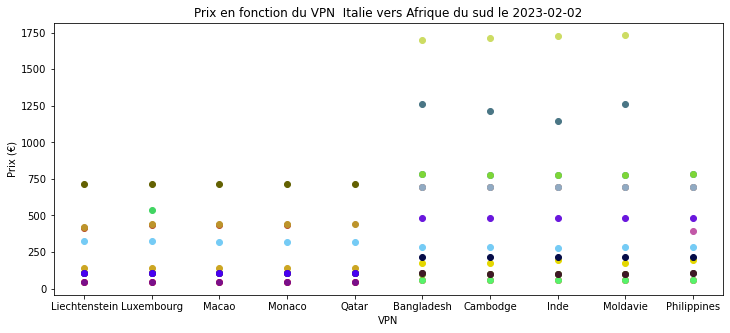

Nb voyage: 35


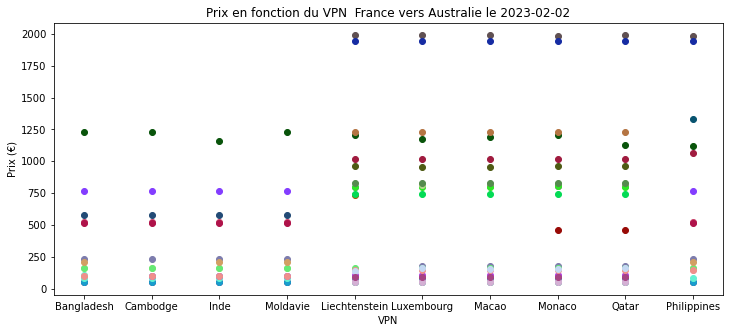

Nb voyage: 32


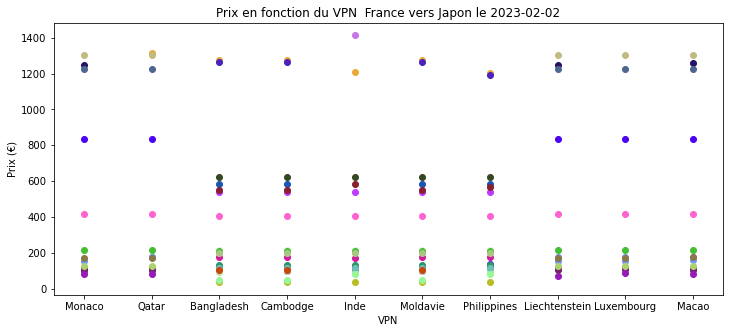

Nb voyage: 23


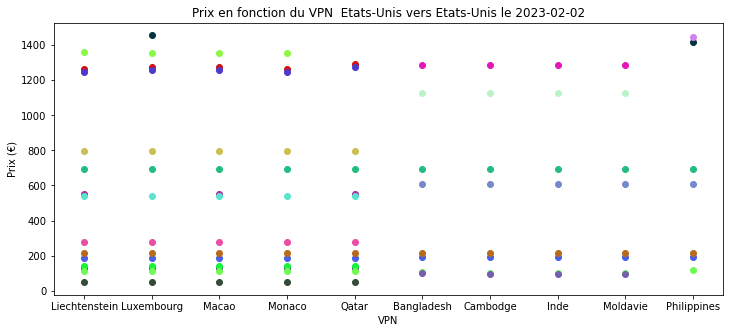

Nb voyage: 27


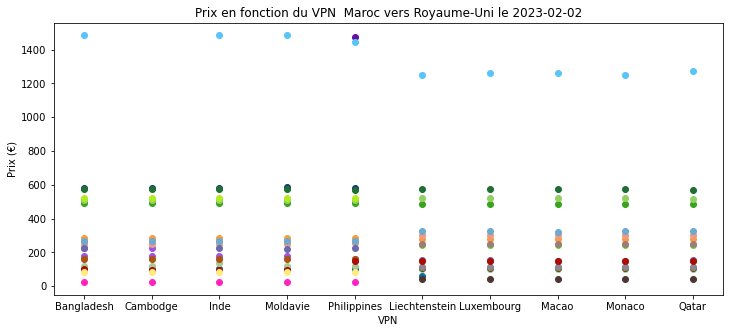

Nb voyage: 25


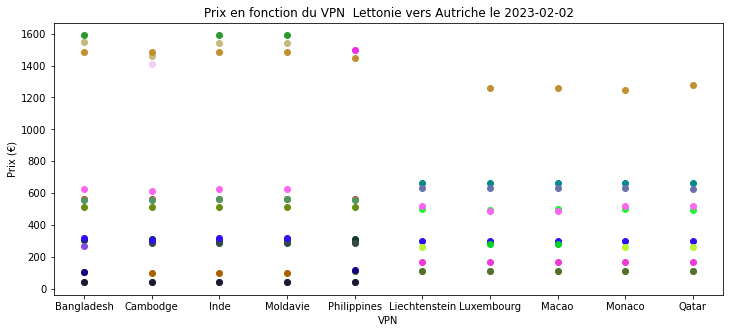

Nb voyage: 22


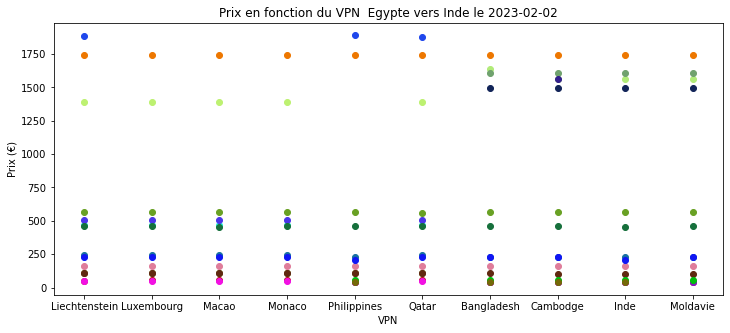

Nb voyage: 13


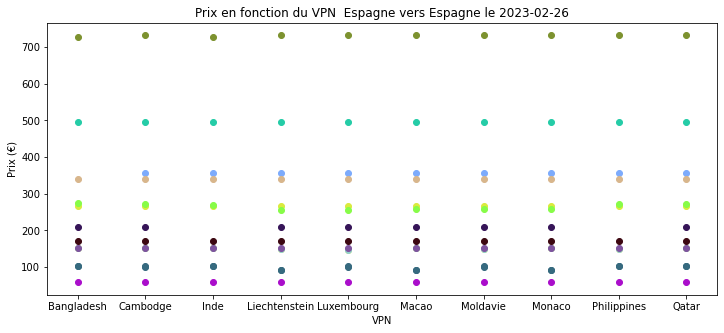

Nb voyage: 15


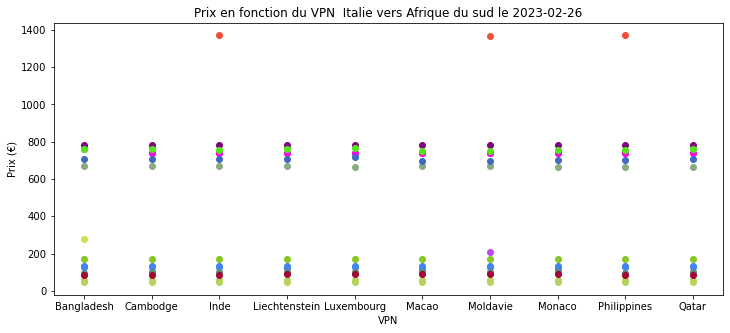

Nb voyage: 25


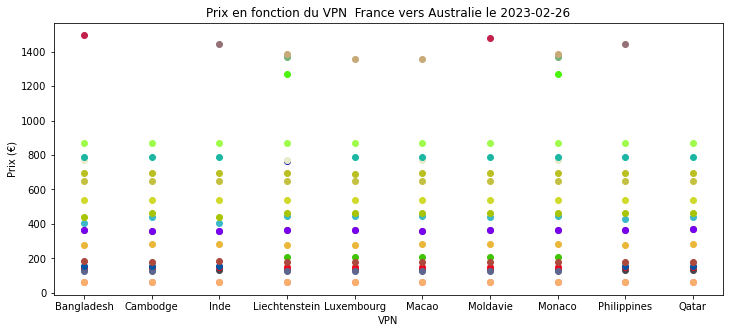

Nb voyage: 17


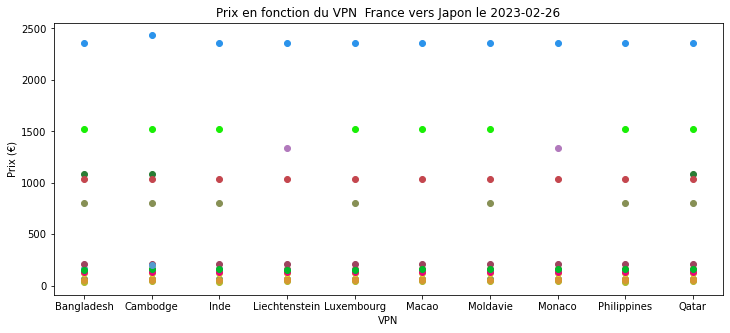

Nb voyage: 18


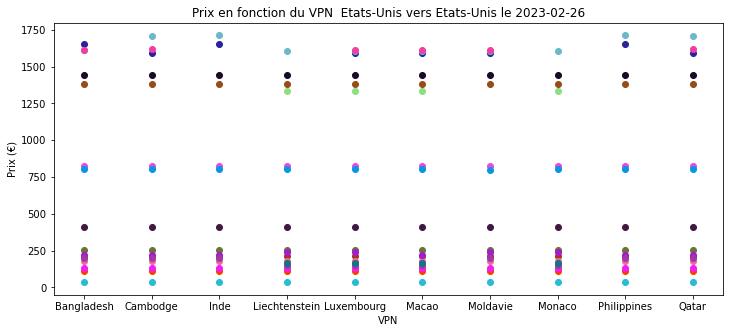

Nb voyage: 17


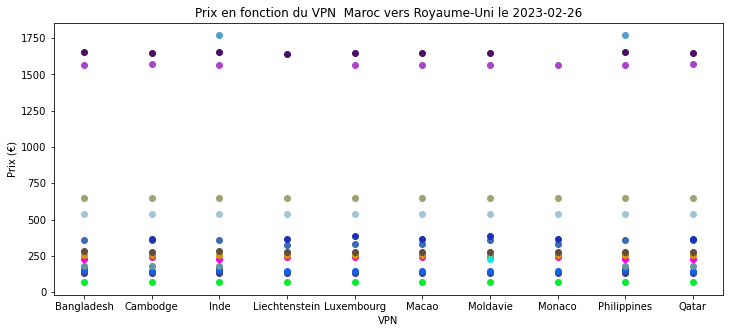

Nb voyage: 18


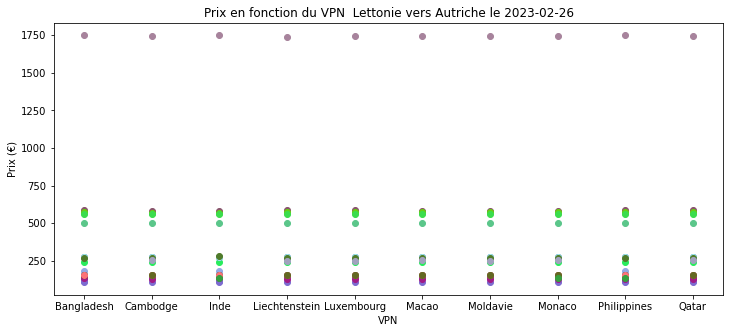

Nb voyage: 17


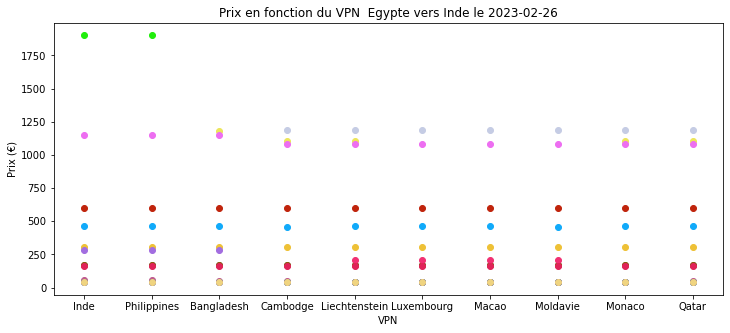

Nb voyage: 13


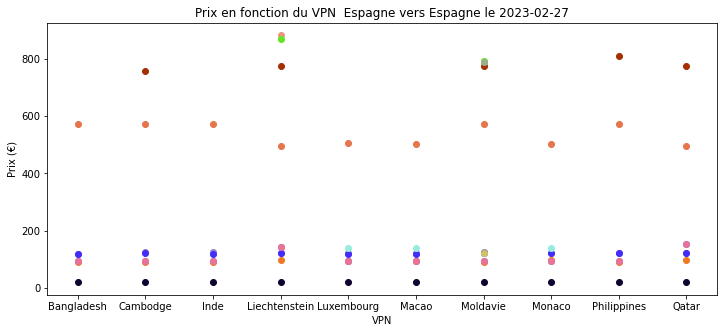

Nb voyage: 17


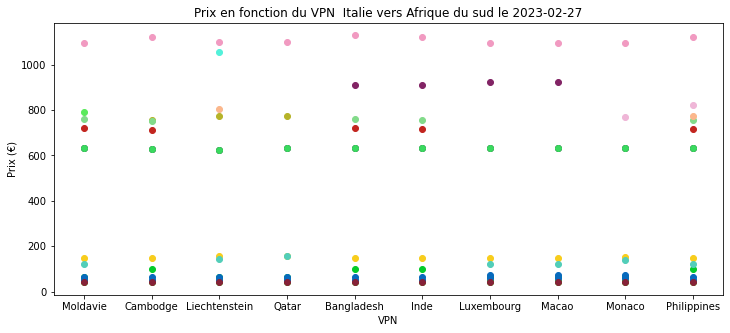

Nb voyage: 24


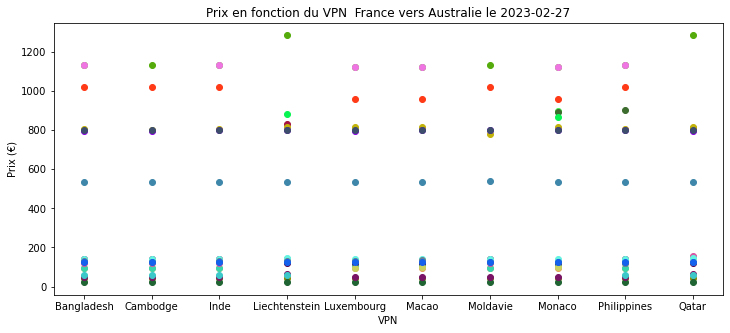

Nb voyage: 31


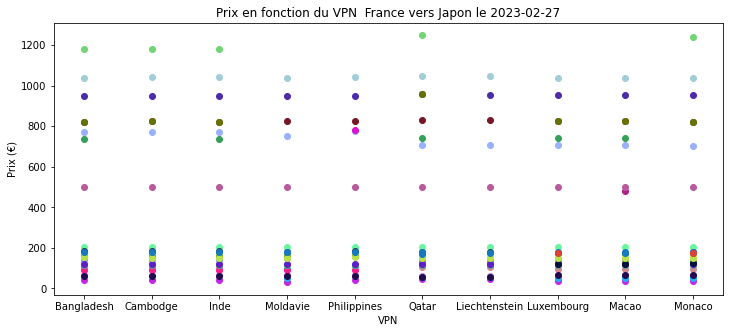

Nb voyage: 21


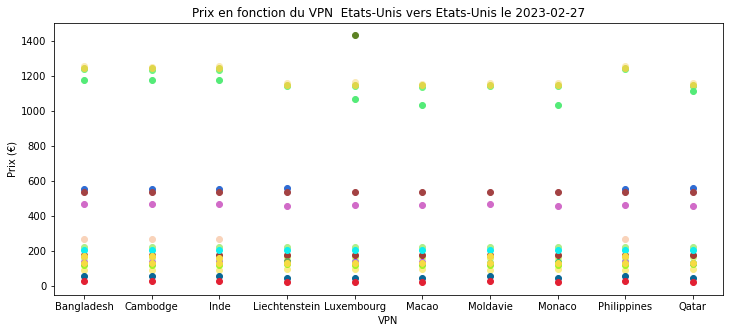

Nb voyage: 17


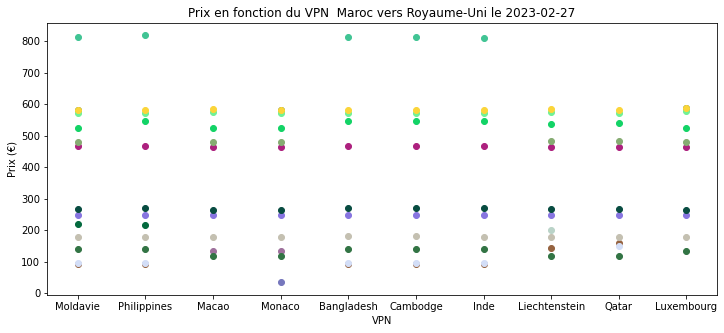

Nb voyage: 22


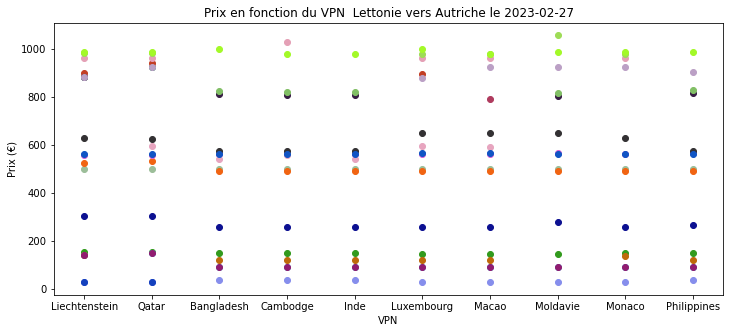

Nb voyage: 17


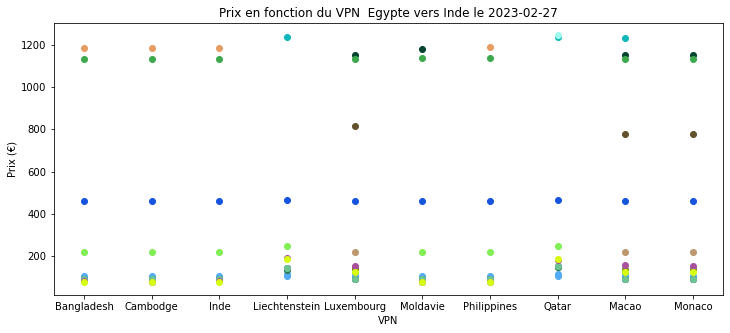

Nb voyage: 17


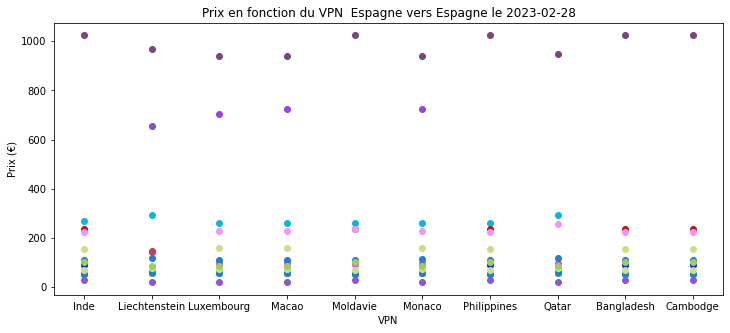

Nb voyage: 16


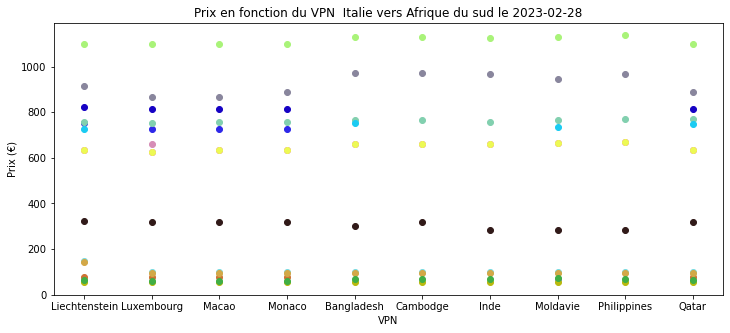

Nb voyage: 20


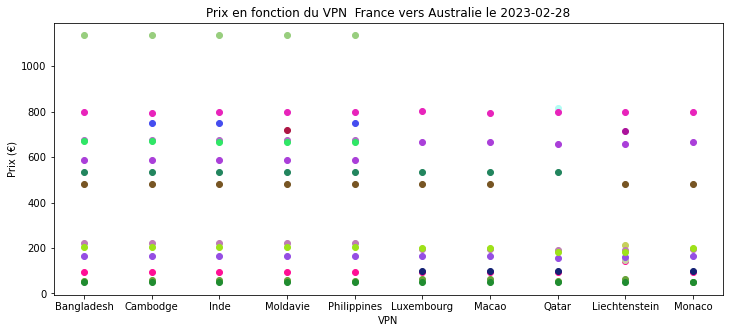

Nb voyage: 24


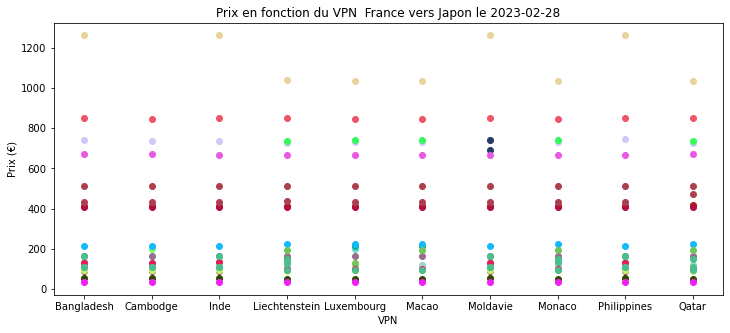

Nb voyage: 19


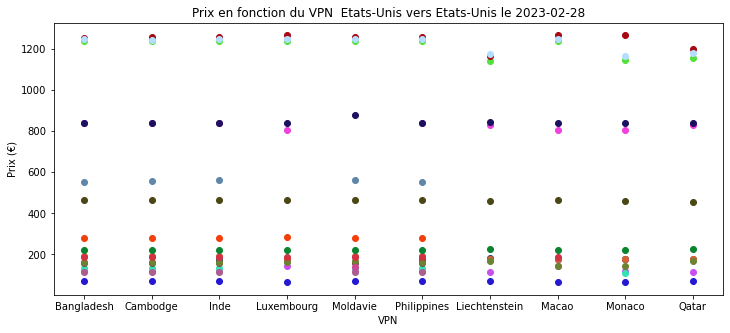

Nb voyage: 17


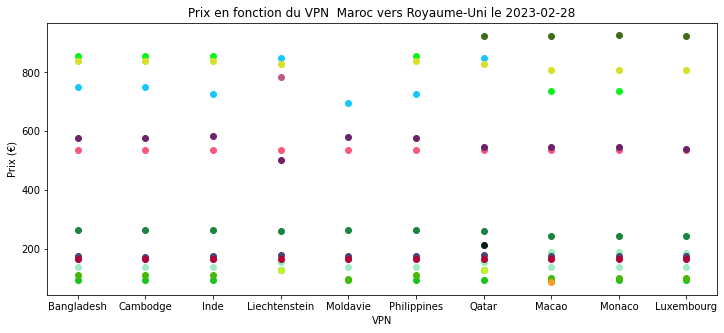

Nb voyage: 19


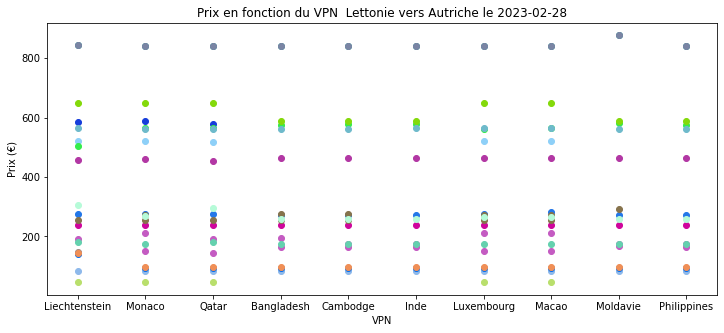

Nb voyage: 17


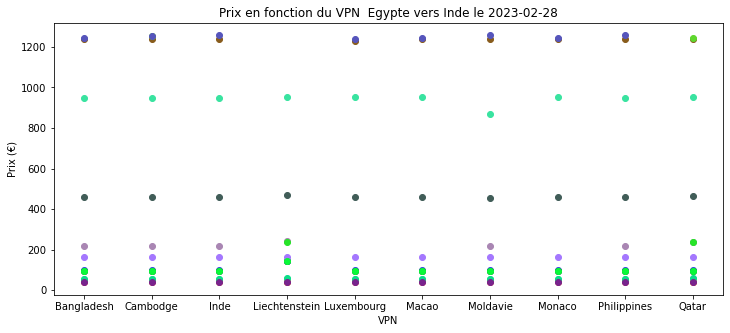

In [61]:
for j in range(len(df_sorted_nb_vols)):
    print("Nb voyage:", df_sorted_nb_vols["Temps de vol"][j])
    fig = plt.figure(1, figsize=(12, 5))
    nombre_de_vols = int(df_sorted_nb_vols["Temps de vol"][j])

    depart= df_sorted_nb_vols["Depart_pays"][j]
    arrive= df_sorted_nb_vols["Arrivé_pays"][j]
    date = df_sorted_nb_vols["Date"][j]

    if j==0:
        ancien_count = 0
        nouveau_count = nombre_de_vols
    
    else:
        ancien_count = nouveau_count
        nouveau_count = ancien_count + nombre_de_vols


    for i in range(ancien_count, nouveau_count):

        # Récupérer les valeurs de VPN et de prix de votre dataset
        vpns = df_sorted_by_same_flight["VPN"][i]
        prices = df_sorted_by_same_flight["Prix"][i]
        sorted(prices) 
        couleur = random_color()

        # Tracer un nuage de points avec plt
        plt.scatter(vpns, prices, c = couleur)

        # Ajouter un titre et des étiquettes aux axes
        title= 'Prix en fonction du VPN '+ str(depart) +" vers"+ str(arrive) + " le "+ str(date)
        plt.title(title)
        plt.xlabel('VPN')
        plt.ylabel('Prix (€)')
        
    # Afficher le graphique
    plt.show()

### Pour visualiser le prix moyen en fonction du VPN - legende voyage

Text(0, 0.5, 'Prix (€)')

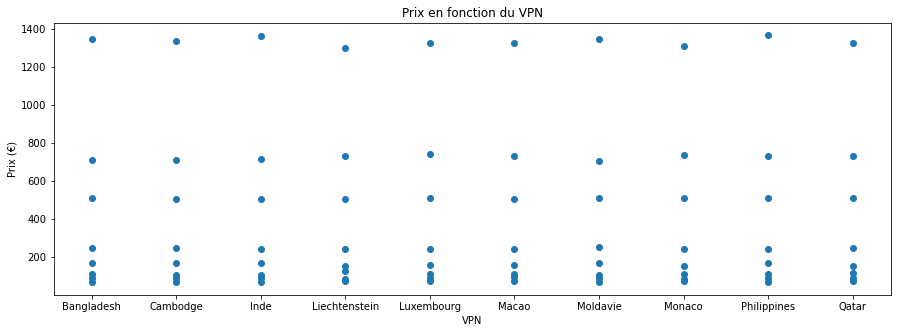

In [ ]:
fig = plt.figure(1, figsize=(15, 5))

plt.scatter(df_sorted_by_trip["VPN"], df_sorted_by_trip["Prix"])
plt.title("Prix en fonction du VPN")
plt.xlabel('VPN')
plt.ylabel('Prix (€)')

Mettre condition Si ce voyage alors tel couleur

In [ ]:
def color(val):
    if val == ' Espagne to Espagne':
        color = 'red'
    elif val == ' Italie to Afrique du sud':
        color = 'green'
    elif val == ' France to Australie':
        color = 'yellow'
    elif val == ' France to Japon':
        color = 'orange'
    elif val == ' Etats-Unis to Etats-Unis':
        color = 'magenta'
    elif val == ' Maroc to Royaume-Uni':
        color = 'aqua'
    elif val == ' Canada to Grèce':
        color = 'blue'
    elif val == ' Lettonie to Autriche':
        color = 'black'
    elif val == ' Egypte to Inde':
        color = 'brown'    
    return color

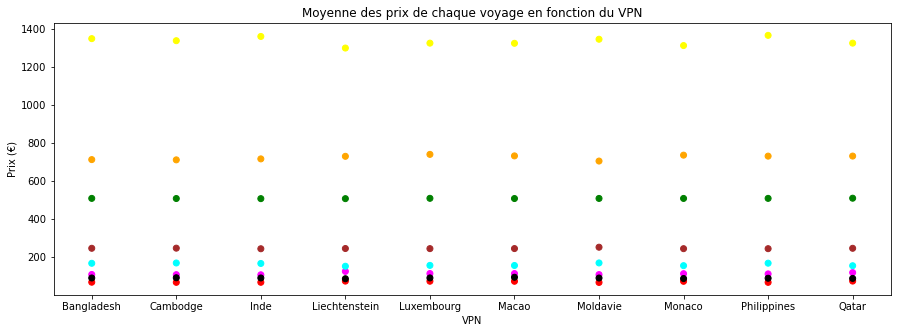

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un objet Figure et un sous-ensemble d'objets Axes
fig, ax = plt.subplots(figsize=(15, 5))

# Tracer le nuage de points en utilisant la séquence de couleurs
list_couleur = df_sorted_by_trip["Depart_Arrive"].apply(color)
scatter = ax.scatter(df_sorted_by_trip["VPN"], df_sorted_by_trip["Prix"], c=list_couleur)

# Ajouter un titre et des étiquettes aux axes
ax.set_title("Moyenne des prix de chaque voyage en fonction du VPN")
ax.set_xlabel('VPN')
ax.set_ylabel('Prix (€)')

# Afficher le graphique
plt.show()

### Evolution du prix moyen VS PIB

#### Scatterplot

In [ ]:
df_sorted_by_trip_and_PIB

,VPN,Depart,Arrivé,Depart_Arrive,PIB par habitant (€),Prix
0,Cambodge,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France to Australie,3400.0,1338.923810
1,Cambodge,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,3400.0,247.552381
2,Cambodge,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,3400.0,91.847619
3,Cambodge,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,3400.0,169.571429
4,Cambodge,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis to Etats-Unis,3400.0,108.142857
...,...,...,...,...,...,...
75,Liechtenstein,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,118235.0,152.457143
76,Liechtenstein,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,118235.0,86.685714
77,Liechtenstein,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,118235.0,245.704762
78,Liechtenstein,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie to Afrique du sud,118235.0,508.009524


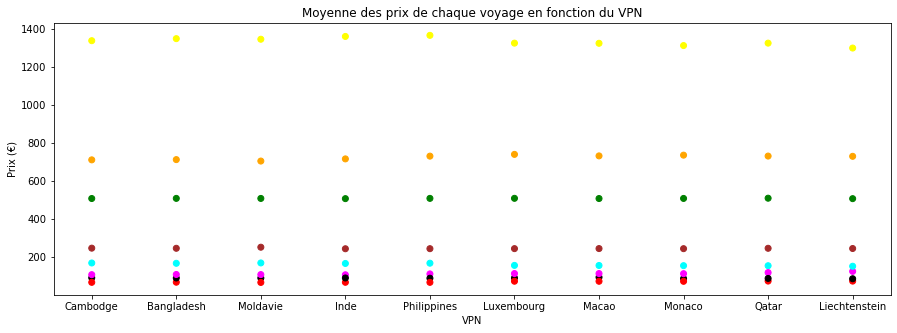

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un objet Figure et un sous-ensemble d'objets Axes
fig, ax = plt.subplots(figsize=(15, 5))

# Tracer le nuage de points en utilisant la séquence de couleurs
list = df_sorted_by_trip_and_PIB["Depart_Arrive"].apply(color)
scatter = ax.scatter(df_sorted_by_trip_and_PIB["VPN"], df_sorted_by_trip_and_PIB["Prix"], c=list)

# Ajouter un titre et des étiquettes aux axes
ax.set_title("Moyenne des prix de chaque voyage en fonction du VPN")
ax.set_xlabel('VPN')
ax.set_ylabel('Prix (€)')

# Afficher le graphique
plt.show()

#### Boxplot

In [ ]:
df_pib = pd.read_excel("data/PIB_annuel_et_PPA_par_pays_utile.xlsx")
df_pib_head = df_pib.head(5)
df_pib_tail = df_pib.tail(5)
df_pib = pd.concat([df_pib_head, df_pib_tail]).reset_index()
df_pib=df_pib.drop("index",axis=1)
# convert $ to €
df_pib["PIB par habitant (€)"] = df_pib["PIB par habitant ($)"] * 0.84
df_pib=df_pib.drop("PIB par habitant ($)",axis=1)
df_pib

,Pays,PIB par habitant (€)
0,Cambodge,3360.0
1,Bangladesh,3528.0
2,Moldavie,4788.0
3,Inde,6048.0
4,Philippines,6888.0
5,Luxembourg,91644.0
6,Macao,96096.0
7,Monaco,97188.0
8,Qatar,104916.0
9,Liechtenstein,116844.0


In [ ]:
df_sorted_by_trip_and_PIB

,VPN,Depart,Arrivé,Depart_Arrive,PIB par habitant (€),Prix
0,Cambodge,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France to Australie,3400.0,1338.923810
1,Cambodge,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,3400.0,247.552381
2,Cambodge,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,3400.0,91.847619
3,Cambodge,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,3400.0,169.571429
4,Cambodge,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis to Etats-Unis,3400.0,108.142857
...,...,...,...,...,...,...
75,Liechtenstein,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,118235.0,152.457143
76,Liechtenstein,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,118235.0,86.685714
77,Liechtenstein,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,118235.0,245.704762
78,Liechtenstein,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie to Afrique du sud,118235.0,508.009524


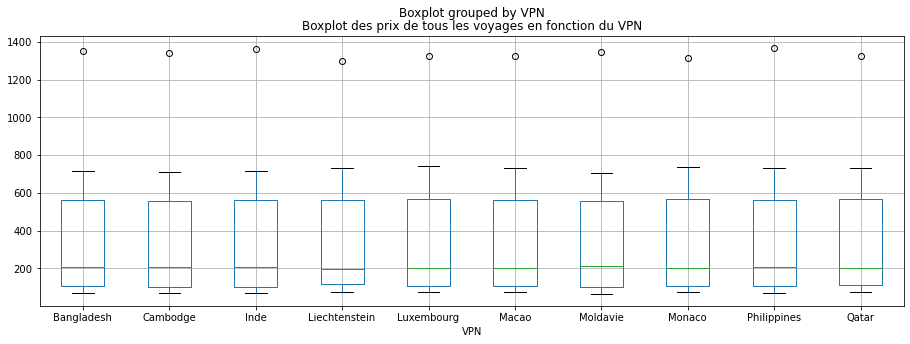

In [ ]:
# boxplot of the data
df_sorted_by_trip_and_PIB.boxplot(column=['Prix'], by='VPN', figsize=(15, 5))
plt.title("Boxplot des prix de tous les voyages en fonction du VPN")
plt.show()


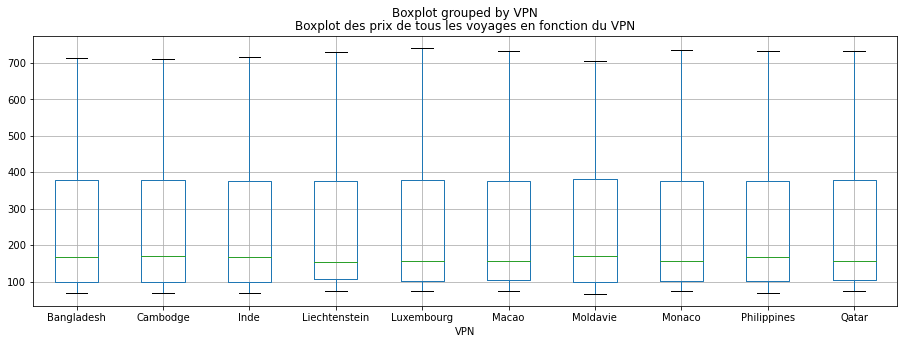

In [ ]:
# remove outliers
df_sorted_by_trip_and_PIB_outliner = df_sorted_by_trip_and_PIB[df_sorted_by_trip_and_PIB["Prix"] < 1000]
df_sorted_by_trip_and_PIB_outliner.boxplot(column=['Prix'], by='VPN', figsize=(15, 5))
plt.title("Boxplot des prix de tous les voyages en fonction du VPN")
plt.show()

#### Lines

In [ ]:
# get the median of each VPN
df_median_by_vpn = df_sorted_by_trip_and_PIB.groupby('VPN').median().reset_index()
# rename the column "Prix" to "median"
df_median_by_vpn = df_median_by_vpn.rename(columns={"Prix": "median price"})
# get the mean of each VPN
df_mean_by_vpn = df_sorted_by_trip_and_PIB.groupby('VPN').mean().reset_index()
# add the mean to df_median_by_vpn
df_median_by_vpn["mean price"] = df_mean_by_vpn["Prix"]

# Trier les données en fonction du PIB par habitant
df_median_by_vpn.sort_values(by='PIB par habitant (€)', inplace=True)

df_median_by_vpn

,VPN,PIB par habitant (€),median price,mean price
1,Cambodge,3400.0,208.561905,405.565476
0,Bangladesh,3570.0,207.390476,406.944849
6,Moldavie,4845.0,211.166667,406.259524
2,Inde,6120.0,205.752381,408.027049
8,Philippines,6970.0,206.680952,411.302381
4,Luxembourg,92735.0,201.000000,407.167857
5,Macao,97240.0,200.909524,406.304762
7,Monaco,98345.0,200.223810,404.259524
9,Qatar,106165.0,200.995238,406.538095
3,Liechtenstein,118235.0,199.080952,402.927381


Text(0.5, 1.0, 'Moyenne et médiane des prix de tous les voyages en fonction du VPN')

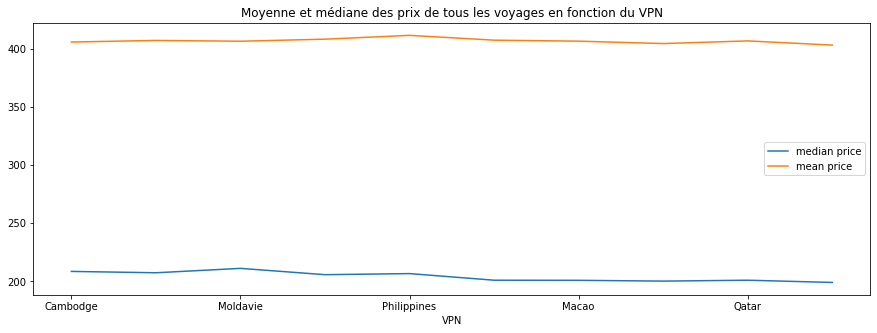

In [60]:
# create a histogram of the median price and mean price depending on the same VPN
df_median_by_vpn.plot(x="VPN", y=["median price", "mean price"], figsize=(15, 5))
plt.title("Moyenne et médiane des prix de tous les voyages en fonction du VPN")

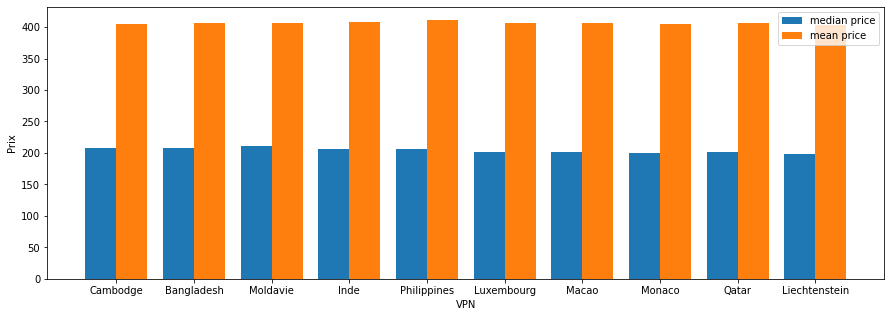

In [ ]:
# Create the horizontal positions for the bars
x_pos = np.arange(len(df_median_by_vpn))

fig = plt.figure(1, figsize=(15, 5))
# Create the bar chart
bar_width = 0.4
plt.bar(x_pos, df_median_by_vpn['median price'], bar_width, label='median price')
plt.bar(x_pos + bar_width, df_median_by_vpn['mean price'], bar_width, label='mean price')

# Set the x-axis labels
plt.xticks(x_pos + bar_width / 2, df_median_by_vpn['VPN'])
plt.xlabel('VPN')
plt.ylabel('Prix')
plt.legend()
plt.show()


### In February

In [56]:
# get the median of each VPN
df_median_by_vpn_feb = df_sorted_by_trip_and_PIB_february.groupby('VPN').median().reset_index()
# rename the column "Prix" to "median"
df_median_by_vpn_feb = df_median_by_vpn_feb.rename(columns={"Prix": "median price"})
# get the mean of each VPN
df_mean_by_vpn_feb = df_sorted_by_trip_and_PIB_february.groupby('VPN').mean().reset_index()
# add the mean to df_median_by_vpn
df_median_by_vpn_feb["mean price"] = df_mean_by_vpn_feb["Prix"]

# Trier les données en fonction du PIB par habitant
df_median_by_vpn_feb.sort_values(by='PIB par habitant (€)', inplace=True)

Text(0.5, 1.0, 'Moyenne et médiane des prix de tous les voyages en fonction du VPN en fin février')

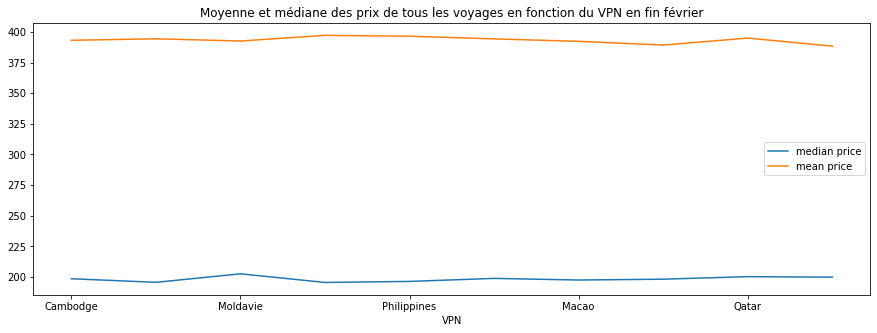

In [59]:
# create a histogram of the median price and mean price depending on the same VPN
df_median_by_vpn_feb.plot(x="VPN", y=["median price", "mean price"], figsize=(15, 5))
# add the title
plt.title("Moyenne et médiane des prix de tous les voyages en fonction du VPN en fin février")

## Correlation

In [ ]:
correlation = df_sorted_by_trip_and_PIB[['PIB par habitant (€)','Prix']].corr()
print(correlation)

                      PIB par habitant (€)      Prix
PIB par habitant (€)              1.000000 -0.002818
Prix                             -0.002818  1.000000
